# Data Quality Checks

### Content:
- Perform EDA
- Mixed Type Data Check
- Missing Value Check
- Fix Inconsistency Issue
- Duplicates

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os

In [2]:
#import data set
path = '/Users/kimballwightman/Desktop/Projects/Car Listings Analysis/'

In [3]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Original Data','true_car_listings.csv'))

## Perform EDA

In [4]:
df_cars.shape

(852122, 8)

In [5]:
df_cars.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [6]:
#check the continuous variables
df_cars.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [7]:
#Price first
df_cars['Price'].value_counts().sort_index()

1500      85
1511       1
1527       1
1534       1
1550       2
          ..
462000     1
469973     1
469991     1
490000     1
499500     1
Name: Price, Length: 47124, dtype: int64

The min and max seemed really even numbers, so I checked to see if there were mutliple values above or below that defaulted to those values. The min value of 1500 is observed 85 times. If they actually are cars with low prices that could be below 1500, then I'd expect them to have on old year and high mileage, which I'll check below.

In [8]:
df_min_price = df_cars[df_cars['Price']==1500]

In [9]:
df_min_price.head(20)

,Price,Year,Mileage,City,State,Vin,Make,Model
64010,1500,2002,107885,Philadelphia,PA,2G4WS52J321276604,Buick,Century4dr
64965,1500,1998,100296,Levittown,PA,2G4WY52M9W1574802,Buick,Century4dr
67075,1500,1998,177213,South Jordan,UT,1G4CU5219W4643710,Buick,Park
68710,1500,1999,160000,Newark,NJ,2G4WB52K6X1507138,Buick,Regal4dr
102581,1500,2009,129703,Lakewood,NJ,KL1TD56E69B664751,Chevrolet,Aveo4dr
106684,1500,2006,110480,Miami,FL,KL1TD66606B644067,Chevrolet,Aveo5dr
112120,1500,1998,113842,Middlesboro,KY,1G1NE52M1W6200680,Chevrolet,Malibu4dr
135021,1500,2004,132519,South Jordan,UT,1GNDX03E04D170692,Chevrolet,VentureExt
135230,1500,2002,160369,Chicago,IL,1GNDT13S222423883,Chevrolet,TrailBlazer4dr
138315,1500,2003,178717,Valdosta,GA,1G1JC52F137258414,Chevrolet,Cavalier4dr


These seem to actually be really low value cars. The data comes from TrueCar.com, which might not let you list a price below 1500. Since there are only 85 out of 852,122 instances, and values can't go much lower than 1500, I'm considering them to be negligible. They'll hardly skew the results of our analysis at all.

<AxesSubplot:ylabel='Frequency'>

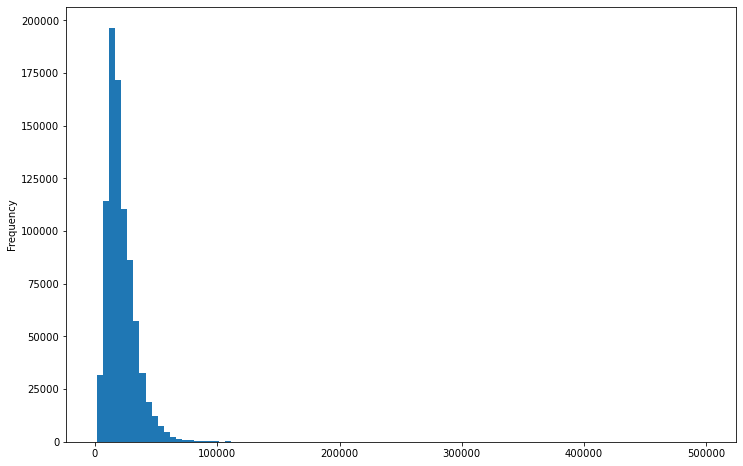

In [10]:
df_cars['Price'].plot.hist(bins = 100, figsize=(12,8))

In [11]:
#Mileage next
df_cars['Mileage'].value_counts().sort_index()

5          350
6          173
7          138
8          180
9          153
          ... 
1650780      1
1814638      1
2137327      1
2457832      1
2856196      1
Name: Mileage, Length: 158836, dtype: int64

<AxesSubplot:ylabel='Frequency'>

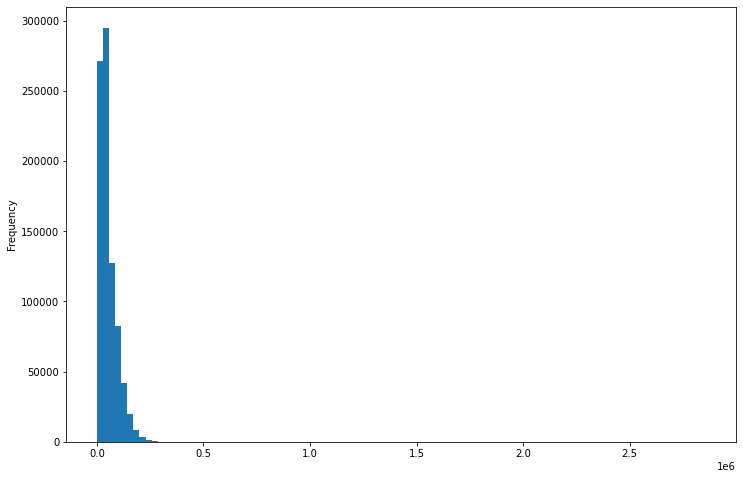

In [12]:
df_cars['Mileage'].plot.hist(bins = 100, figsize=(12,8))

<AxesSubplot:ylabel='Frequency'>

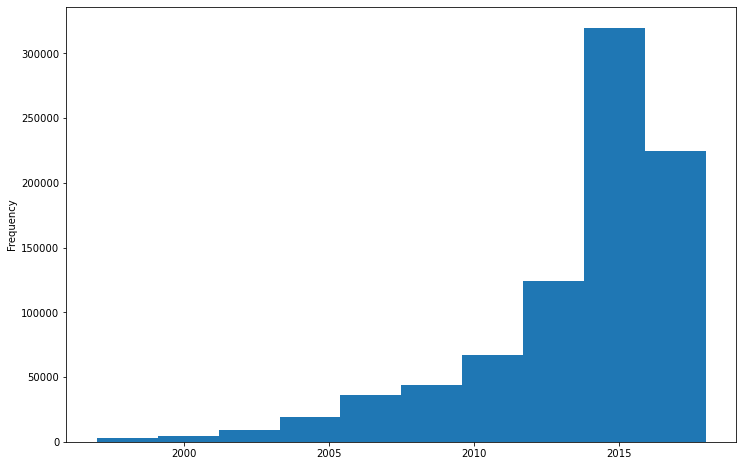

In [13]:
#check distribution of year as well
df_cars['Year'].plot.hist(bins = 10, figsize=(12,8))

In [14]:
df_cars.head(20)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
5,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
6,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial
7,13995,2013,32384,West Jordan,UT,JH4CU2F64DC006203,Acura,TSX5-Speed
8,10495,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed
9,9995,2013,63887,El Paso,TX,19VDE1F50DE010450,Acura,ILX5-Speed


In [15]:
#check the categorical variables
df_cars['City'].value_counts()

Houston          12703
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: City, Length: 2553, dtype: int64

In [16]:
df_cars['State'].value_counts().sort_index()

 AK     1663
 AL    13293
 AR     6952
 AZ    22401
 Az       63
 CA    80437
 CO    23004
 CT    10906
 Ca       31
 DC       25
 DE     2418
 FL    72530
 Fl      783
 GA    39414
 Ga      109
 HI     2995
 IA     4840
 ID     3501
 IL    38680
 IN    16465
 KS     7894
 KY    13691
 LA     8528
 MA    17990
 MD    17572
 ME     1920
 MI    10328
 MN    10996
 MO    16165
 MS     6242
 MT     1984
 Md      135
 NC    37530
 ND     1092
 NE     4924
 NH     5694
 NJ    27852
 NM     4729
 NV     6887
 NY    27932
 OH    23259
 OK     9584
 OR    10352
 Oh       52
 PA    28130
 RI     1858
 SC     9790
 SD     1267
 TN    19166
 TX    94654
 UT    10418
 VA    35011
 VT     1123
 Va      248
 WA    23149
 WI    11255
 WV     1501
 WY      610
 ga      100
Name: State, dtype: int64

There are inconsistencies in Arizona, California, Florida, Georgia(GA,Ga,ga), Maryland, Ohio, and Virginia.

In [17]:
df_cars['Make'].value_counts()

Ford             110432
Chevrolet        102268
Toyota            77786
Nissan            66250
Honda             50193
Jeep              40373
Hyundai           35837
Dodge             34368
BMW               32415
GMC               29008
Kia               28636
Mercedes-Benz     26323
Volkswagen        23249
Lexus             20641
Ram               19808
Subaru            16428
Chrysler          16357
Cadillac          15047
Mazda             13365
Audi              12618
Buick             12491
INFINITI          12258
Acura             11049
Lincoln            7120
Volvo              5106
MINI               4375
Porsche            4106
Land               4096
Mitsubishi         4080
Scion              3043
Jaguar             2200
Pontiac            1783
FIAT               1782
Mercury            1076
Maserati           1047
Saturn              963
HUMMER              949
smart               713
Bentley             367
Ferrari             345
Suzuki              334
Saab            

In [18]:
df_cars['Model'].value_counts()

Silverado          24932
Grand              17321
Accord             14502
F-1504WD           14177
Altima2.5          11288
                   ...  
EdgeLTD                1
ExpeditionEddie        1
EscortSE               1
Ranger                 1
V60Polestar            1
Name: Model, Length: 2736, dtype: int64

### Mixed Type Data

In [19]:
for col in df_cars.columns.tolist():
    mix = (df_cars[[col]].applymap(type) != df_cars[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df_cars[mix]) > 0:
        print (col)

No mixed type columns.

### Missing Values

In [20]:
df_cars.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

No missing values.

### Fix the Inconsistency in the State variable

In [21]:
df_cars['State'].replace({' Az':' AZ',' Ca':' CA',' Fl':' FL',' Ga':' GA',' ga':' GA',' Md':' MD',' Oh':' OH',' Va':' VA',}, inplace = True)


In [22]:
df_cars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [23]:
df_cars['State'].value_counts().sort_index()

 AK     1663
 AL    13293
 AR     6952
 AZ    22464
 CA    80468
 CO    23004
 CT    10906
 DC       25
 DE     2418
 FL    73313
 GA    39623
 HI     2995
 IA     4840
 ID     3501
 IL    38680
 IN    16465
 KS     7894
 KY    13691
 LA     8528
 MA    17990
 MD    17707
 ME     1920
 MI    10328
 MN    10996
 MO    16165
 MS     6242
 MT     1984
 NC    37530
 ND     1092
 NE     4924
 NH     5694
 NJ    27852
 NM     4729
 NV     6887
 NY    27932
 OH    23311
 OK     9584
 OR    10352
 PA    28130
 RI     1858
 SC     9790
 SD     1267
 TN    19166
 TX    94654
 UT    10418
 VA    35259
 VT     1123
 WA    23149
 WI    11255
 WV     1501
 WY      610
Name: State, dtype: int64

In [24]:
df_cars.shape

(852122, 8)

### Duplicates

In [25]:
df_dups = df_cars[df_cars.duplicated()]

In [26]:
df_dups

,Price,Year,Mileage,City,State,Vin,Make,Model
120948,16288,2015,54545,Pensacola,FL,2G1FB1E32F9284364,Chevrolet,CamaroCoupe
120949,19995,2016,17604,Beaumont,TX,2G11Z5SA9G9130915,Chevrolet,ImpalaLS
120950,5774,2008,125675,Fort Wayne,IN,2G1WT58K781214125,Chevrolet,Impala4dr
120951,20990,2017,17219,Marshfield,MO,2G1105S30H9120402,Chevrolet,ImpalaLT
120952,22573,2016,622,Colorado Springs,CO,1GCNCNEC9GZ402232,Chevrolet,Silverado
120953,11495,2014,80086,Langhorne,PA,1G1JC6SH8E4194609,Chevrolet,SonicHatchback
120954,28800,2017,4165,Smyrna,GA,2GNFLGE38H6240856,Chevrolet,EquinoxAWD
120955,14771,2014,78400,New Haven,IN,1G1125S39EU113487,Chevrolet,Impala2LT
120956,15907,2015,65274,Corpus Christi,TX,2G1FB1E30F9190774,Chevrolet,CamaroCoupe
120957,12894,2014,57113,Delray Beach,FL,1G1RA6E44EU129757,Chevrolet,VoltPlug-In


In [27]:
df_no_dups = df_cars.drop_duplicates()

In [28]:
df_no_dups.shape

(852092, 8)

New dataframe has 30 fewer rows, duplicates were successfully dropped.

In [29]:
df_no_dups.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [30]:
#export the dataset (this dataset is from the first attempt at cleaning.)
#df_no_dups.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_cleaned.csv'))

### Data Accuracy

We returned to this script after finding some issues with prices from the 6.2 exploratory analysis script. We'll do some more cleaning from here forward and save a new cleaned dataset to use back in 6.2.

In [30]:
#look at outlier car prices' model and see if there are other similar models to compare by. Use them to impute
#we'll need to take out the normally high-priced cars and then do searches for them individually
price_outliers = df_no_dups[~df_no_dups['Make'].isin(['Acura','Aston','Audi','Bentley','Ferrari','Lamborghini','Land','Maserati','McLaren','Mercedes-Benz','Porsche','Rolls-Royce'])]


In [38]:
price_outliers[price_outliers['Price']>= 99000]

,Price,Year,Mileage,City,State,Vin,Make,Model
69150,99998,2006,277835,Rockford,MI,1G4HD572X6U214387,Buick,Lucerne4dr
69151,99999,2002,205342,Rockford,MI,1G4HP54K32U244045,Buick,LeSabre4dr
84189,99995,2017,19775,Morrow,GA,1GYKNBRS0HZ124135,Cadillac,XT5Luxury
84197,99999,2004,191000,Rockford,MI,1GYEE637440175225,Cadillac,SRX4dr
84198,374813,2017,12511,Beachwood,OH,2G61N5S3XH9125733,Cadillac,XTSAWD
...,...,...,...,...,...,...,...,...
823762,99999,2015,47561,Morrow,GA,JTDKN3DU7F1989846,Toyota,PriusFive
823763,99995,2013,76641,Morrow,GA,JTDKTUD33DD568379,Toyota,Yaris5-Door
823764,99999,2003,259732,Harrison,AR,JTEHF21A130149294,Toyota,Highlander4dr
823765,99997,2000,251587,Boerne,TX,JT3GN86R4Y0180135,Toyota,4Runner4dr


Outlier models that aren't around the 99999.0 price:
 
- Buick: Lucerne4dr, LeSabre4dr
- Cadillac: XTSAWD
- Chevrolet: CorvetteCoupe, Silverado, TraverseFWD
- Chrysler: Town
- Dodge: ViperSRT, ViperGTC, DartSXT, JourneyFWD, ViperACR
- Ford: MustangCoupe, GT2dr
- GMC: AcadiaAWD
- Honda: Civic, OdysseyEX, CR-V4WD, PilotEX, Ridgeline4WD
- Hyundai: Sonata2.4L, ElantraLimited, SonataSE, Elantra4dr, VeracruzAWD
- Jaguar: XF35t
- Jeep: CompassLatitude, Wrangler, Grand, RenegadeSport, RenegadeTrailhawk
- Lexus: GS, LFA2dr, 
- Maybach: 624dr
- Mercury: Grand
- Nissan: GT-RNISMO, GT-RPremium,
- Pontiac: Grand
- Ram: 1500Lone, ProMaster
- Subaru: Impreza
- Tesla: Model (blank)
- Toyota: CorollaS, CamryXSE, CamryL, PriusFive, CorollaSE, CamryXLE, Prius, CorollaL, Camry4dr, Yaris5-Door, Highlander4dr, 4Runner4dr

In [32]:
#I used this line of code iteratively for each model we found
#have to look at each model one by one to make judgement call on if outliers are valid prices or not
df_no_dups[(df_no_dups['Model']=='Yaris5-Door')]

,Price,Year,Mileage,City,State,Vin,Make,Model
755788,10222,2016,39266,Chesapeake,VA,VNKKTUD3XGA059015,Toyota,Yaris5-Door
756195,9497,2015,36844,Anchorage,AK,VNKKTUD36FA043246,Toyota,Yaris5-Door
756542,8988,2015,40993,Newport News,VA,VNKKTUD30FA027043,Toyota,Yaris5-Door
756894,7986,2015,31456,Doral,FL,VNKKTUD38FA038792,Toyota,Yaris5-Door
757873,11732,2016,25445,Daphne,AL,VNKKTUD32GA061003,Toyota,Yaris5-Door
758047,7486,2015,40997,Doral,FL,VNKKTUD37FA028528,Toyota,Yaris5-Door
758733,7486,2015,43347,Doral,FL,VNKKTUD39FA038283,Toyota,Yaris5-Door
759234,9990,2015,33016,Holiday,FL,VNKKTUD31FA039444,Toyota,Yaris5-Door
759302,7986,2015,39109,Doral,FL,VNKKTUD34FA028583,Toyota,Yaris5-Door
759544,9895,2015,16874,Midway City,CA,VNKKTUD32FA045687,Toyota,Yaris5-Door


Some of the names of the models of cars only got the first part picked up in the web-scraping. For example, the model "Grand" applies to Dodge, Jeep, Mercury, Pontiac, and Suzuki. I need to uniquely identify these models by combining them with their make.

The only problem/limitation here with this dataset is that I have no way of separating prices of models like "Grand" for Jeep, when Jeep has multiple models that begin with "Grand". This is because of an issue with how the data was scraped, so there isn't a way to recover this. I'm treating them as the same model, which will cause some bias. Another example of this is Tesla Model. All their models begin with "Model" and that's all that shows up in the dataset.

For outlier models that didn't have hardly any other models to compare against and had a feasible price, I'm leaving them in the dataset. Being a rare model is much more likely to have a high price. An example of this is the Dodge Viper.

Rare car models that are left alone:
- ViperSRT, ViperGTC, ViperACR, GT2dr, LFA2dr, 624dr, GT-RNISMO, 

In [33]:
#add a column that uniquely identifies each car's make and model to fix the "Grand" model problem
df_no_dups['make_model'] = df_no_dups['Make'] + ' ' + df_no_dups['Model']

/var/folders/xc/ylpjjr355mvbsrpkf5n9y7x00000gn/T/ipykernel_41421/2227132873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['make_model'] = df_no_dups['Make'] + ' ' + df_no_dups['Model']


In [34]:
df_no_dups.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,Acura ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,Acura ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,Acura ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,Acura ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,Acura ILXAutomatic


In [35]:
#make a df for median prices for each model by year
#find the median price for each model to use in imputation
median_prices = df_no_dups.groupby(['make_model','Year']).agg({'Price':['median']})

In [36]:
#reformat the dataframe to make it easier to call
median_prices.reset_index(inplace=True)
median_prices = median_prices.droplevel(1, axis=1)

In [39]:
median_prices

,make_model,Year,Price
0,AM General,1997,62989.5
1,AM General,1998,47499.5
2,AM General,1999,48097.5
3,AM General,2000,59995.0
4,AM General,2001,67497.5
...,...,...,...
9280,smart fortwopassion,2017,14600.0
9281,smart fortwoprime,2017,14998.5
9282,smart fortwopure,2013,6822.0
9283,smart fortwopure,2014,6999.0


In [40]:
#make a df for all price outliers listed above, not including the rare models

#first reset price_outliers now that make_model has been added
price_outliers = df_no_dups[~df_no_dups['Make'].isin(['Acura','Aston','Audi','Bentley','Ferrari','Lamborghini','Land','Maserati','McLaren','Mercedes-Benz','Porsche','Rolls-Royce'])]

price_outliers = price_outliers[price_outliers['Price']>= 99000]
price_outliers = price_outliers.loc[price_outliers['make_model'].isin(['Buick Lucerne4dr', 'Buick LeSabre4dr', 'Cadillac XTSAWD', 'Chevrolet CorvetteCoupe', 'Chevrolet Silverado', 
'Chevrolet TraverseFWD', 'Chrysler Town', 'Dodge DartSXT', 'Dodge JourneyFWD', 'Ford MustangCoupe', 'GMC AcadiaAWD',
'Honda Civic', 'Honda OdysseyEX', 'Honda CR-V4WD', 'Honda PilotEX', 'Honda Ridgeline4WD', 'Hyundai Sonata2.4L',
'Hyundai ElantraLimited', 'Hyundai SonataSE', 'Hyundai Elantra4dr', 'Hyundai VeracruzAWD', 'Jaguar XF35t',
'Jeep CompassLatitude', 'Jeep Wrangler', 'Jeep Grand', 'Jeep RenegadeSport', 'Jeep RenegadeTrailhawk', 'Lexus GS',
'Mercury Grand', 'Nissan GT-RPremium', 'Pontiac Grand', 'Ram 1500Lone', 'Ram ProMaster', 'Subaru Impreza', 'Tesla Model',
'Toyota CorollaS', 'Toyota CamryXSE', 'Toyota CamryL', 'Toyota PriusFive', 'Toyota CorollaSE', 'Toyota CamryXLE', \
'Toyota Prius', 'Toyota CorollaL', 'Toyota Camry4dr', 'Toyota Yaris5-Door', 'Toyota Highlander4dr', 'Toyota 4Runner4dr'])]


In [42]:
price_outliers['make_model'].value_counts()

Toyota CorollaS            30
Toyota CamryXSE            24
Hyundai ElantraLimited     13
Tesla Model                10
Toyota CamryXLE             9
Hyundai Sonata2.4L          8
Hyundai SonataSE            7
Honda Civic                 5
Toyota PriusFive            4
Jeep Wrangler               4
Toyota CorollaL             3
Chrysler Town               3
Toyota Prius                2
Chevrolet TraverseFWD       2
Toyota CorollaSE            2
Subaru Impreza              1
Ram ProMaster               1
Ram 1500Lone                1
Pontiac Grand               1
Nissan GT-RPremium          1
Toyota CamryL               1
Lexus GS                    1
Toyota Camry4dr             1
Toyota Yaris5-Door          1
Toyota Highlander4dr        1
Mercury Grand               1
Buick Lucerne4dr            1
Jeep RenegadeTrailhawk      1
Jeep RenegadeSport          1
Cadillac XTSAWD             1
Chevrolet CorvetteCoupe     1
Chevrolet Silverado         1
Dodge DartSXT               1
Dodge Jour

In [43]:
#add another variable that concatenates make_model and year
price_outliers['year_mm_id'] = price_outliers['Year'].astype(str) + ' ' + price_outliers['make_model']

In [44]:
#needs to be in the median_prices df as well for looking up the median price based on the model/year
median_prices['year_mm_id'] = median_prices['Year'].astype(str) + ' ' + median_prices['make_model']

In [55]:
median_prices

,make_model,Year,Price,year_mm_id
0,AM General,1997,62989.5,1997 AM General
1,AM General,1998,47499.5,1998 AM General
2,AM General,1999,48097.5,1999 AM General
3,AM General,2000,59995.0,2000 AM General
4,AM General,2001,67497.5,2001 AM General
...,...,...,...,...
9280,smart fortwopassion,2017,14600.0,2017 smart fortwopassion
9281,smart fortwoprime,2017,14998.5,2017 smart fortwoprime
9282,smart fortwopure,2013,6822.0,2013 smart fortwopure
9283,smart fortwopure,2014,6999.0,2014 smart fortwopure


In [56]:
price_outliers

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model,year_mm_id
69150,99998,2006,277835,Rockford,MI,1G4HD572X6U214387,Buick,Lucerne4dr,Buick Lucerne4dr,2006 Buick Lucerne4dr
69151,99999,2002,205342,Rockford,MI,1G4HP54K32U244045,Buick,LeSabre4dr,Buick LeSabre4dr,2002 Buick LeSabre4dr
84198,374813,2017,12511,Beachwood,OH,2G61N5S3XH9125733,Cadillac,XTSAWD,Cadillac XTSAWD,2017 Cadillac XTSAWD
186452,110000,2016,1021,Cartersville,GA,1G1YU2D6XG5700244,Chevrolet,CorvetteCoupe,Chevrolet CorvetteCoupe,2016 Chevrolet CorvetteCoupe
186457,111975,2009,107238,Cabot,AR,1GCEC14XX9Z243849,Chevrolet,Silverado,Chevrolet Silverado,2009 Chevrolet Silverado
...,...,...,...,...,...,...,...,...,...,...
823762,99999,2015,47561,Morrow,GA,JTDKN3DU7F1989846,Toyota,PriusFive,Toyota PriusFive,2015 Toyota PriusFive
823763,99995,2013,76641,Morrow,GA,JTDKTUD33DD568379,Toyota,Yaris5-Door,Toyota Yaris5-Door,2013 Toyota Yaris5-Door
823764,99999,2003,259732,Harrison,AR,JTEHF21A130149294,Toyota,Highlander4dr,Toyota Highlander4dr,2003 Toyota Highlander4dr
823765,99997,2000,251587,Boerne,TX,JT3GN86R4Y0180135,Toyota,4Runner4dr,Toyota 4Runner4dr,2000 Toyota 4Runner4dr


In [123]:
#for loop that imputes values using the median price of each model and its year
#needs to consider the median price of the same model AND year
for i in price_outliers.index:
    m = price_outliers.loc[[i],'year_mm_id'].to_string(index=False)
    df_no_dups.loc[[i],'Price'] = median_prices.loc[(median_prices['year_mm_id']== m), 'Price'].values
    

In [125]:
#check the outlier observations to make sure imuptation was successful
df_no_dups.loc[price_outliers.index]

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model
69150,6995.0,2006,277835,Rockford,MI,1G4HD572X6U214387,Buick,Lucerne4dr,Buick Lucerne4dr
69151,3994.5,2002,205342,Rockford,MI,1G4HP54K32U244045,Buick,LeSabre4dr,Buick LeSabre4dr
84198,36000.0,2017,12511,Beachwood,OH,2G61N5S3XH9125733,Cadillac,XTSAWD,Cadillac XTSAWD
186452,74245.0,2016,1021,Cartersville,GA,1G1YU2D6XG5700244,Chevrolet,CorvetteCoupe,Chevrolet CorvetteCoupe
186457,18990.0,2009,107238,Cabot,AR,1GCEC14XX9Z243849,Chevrolet,Silverado,Chevrolet Silverado
...,...,...,...,...,...,...,...,...,...
823762,16991.0,2015,47561,Morrow,GA,JTDKN3DU7F1989846,Toyota,PriusFive,Toyota PriusFive
823763,9195.0,2013,76641,Morrow,GA,JTDKTUD33DD568379,Toyota,Yaris5-Door,Toyota Yaris5-Door
823764,6992.5,2003,259732,Harrison,AR,JTEHF21A130149294,Toyota,Highlander4dr,Toyota Highlander4dr
823765,6274.5,2000,251587,Boerne,TX,JT3GN86R4Y0180135,Toyota,4Runner4dr,Toyota 4Runner4dr


In [49]:
#now for the high-priced models (excluded from price_outliers, still need to check them). 
#I'm using the catplot from 6.2's exploratory analysis to eyeball the cutoffs on price
df_no_dups[(df_no_dups['Price']>= 110000) & (df_no_dups['Make']== 'Acura')]

,Price,Year,Mileage,City,State,Vin,Make,Model
11029,162500,2017,119,Sarasota,FL,19UNC1B08HY000729,Acura,NSXCoupe
11030,165888,2017,374,Thousand Oaks,CA,19UNC1B08HY000259,Acura,NSXCoupe
11031,165997,2017,532,Pelham,AL,19UNC1B06HY000793,Acura,NSXCoupe
11032,169929,2017,1522,Hoffman Estates,IL,19UNC1B09HY000335,Acura,NSXCoupe
11033,169998,2017,197,Wichita,KS,19UNC1B05HY000462,Acura,NSXCoupe
11034,175600,2017,26,Brentwood,TN,19UNC1B0XHY000716,Acura,NSXCoupe
11035,173998,2017,543,Palatine,IL,19UNC1B03HY000086,Acura,NSXCoupe
11036,164837,2017,150,Woodside,NY,19UNC1B06HY000180,Acura,NSXCoupe
11037,165399,2017,52,Tucson,AZ,19UNC1B02HY000435,Acura,NSXCoupe
11038,164995,2017,94,Virginia Beach,VA,19UNC1B00HY000224,Acura,NSXCoupe


In [50]:
df_no_dups[(df_no_dups['Price']>= 250000) & (df_no_dups['Make']== 'Bentley')]

,Price,Year,Mileage,City,State,Vin,Make,Model
24244,279990,2017,3966,Rancho Mirage,CA,SCBBF7ZHXHC002795,Bentley,MulsanneSedan
24245,279988,2017,1197,Naples,FL,SJAAC2ZV7HC015466,Bentley,BentaygaW12


In [51]:
df_no_dups[(df_no_dups['Model']=='BentaygaW12')]

,Price,Year,Mileage,City,State,Vin,Make,Model
24223,199995,2017,10722,Northbrook,IL,SJAAC2ZV9HC014402,Bentley,BentaygaW12
24224,209899,2017,3696,Newport Beach,CA,SJAAC2ZV9HC015565,Bentley,BentaygaW12
24225,209899,2017,8200,Newport Beach,CA,SJAAC2ZV5HC012520,Bentley,BentaygaW12
24226,209877,2017,6009,Hillside,NJ,SJAAC2ZV5HC015059,Bentley,BentaygaW12
24230,215000,2017,1395,Charlotte,NC,SJAAC2ZV7HC015743,Bentley,BentaygaW12
24231,214999,2017,1843,Charlotte,NC,SJAAC2ZV9HC014867,Bentley,BentaygaW12
24232,215000,2017,2184,Charlotte,NC,SJAAC2ZVXHC015736,Bentley,BentaygaW12
24233,214888,2017,2786,New York,NY,SJAAC2ZV6HC013952,Bentley,BentaygaW12
24234,215000,2017,3540,Montclair,CA,SJAAC2ZV7HC015094,Bentley,BentaygaW12
24236,224995,2017,263,Northbrook,IL,SJAAC2ZV4HC015823,Bentley,BentaygaW12


In [52]:
df_no_dups[(df_no_dups['Price']>= 300000) & (df_no_dups['Make']== 'McLaren')]

,Price,Year,Mileage,City,State,Vin,Make,Model
595936,369900,2016,110,Fort Lauderdale,FL,SBM11SAA3GW067517,McLaren,675LT2dr
595937,374990,2016,780,Newtown Square,PA,SBM11SAA8GW675680,McLaren,675LT2dr
595938,384983,2016,725,Pinellas Park,FL,SBM11SAA6GW067513,McLaren,675LT2dr
595939,398765,2016,169,Beverly Hills,CA,SBM11SAA0GW675575,McLaren,675LT2dr
595940,427730,2016,330,Newtown Square,PA,SBM11SAA8GW675758,McLaren,675LT2dr
595941,433500,2016,322,Beverly Hills,CA,SBM11SAAXGW675583,McLaren,675LT2dr
595942,459880,2016,313,Beverly Hills,CA,SBM11SAAXGW675941,McLaren,675LT2dr


In [53]:
df_no_dups[(df_no_dups['Model']=='675LT2dr')]

,Price,Year,Mileage,City,State,Vin,Make,Model
595936,369900,2016,110,Fort Lauderdale,FL,SBM11SAA3GW067517,McLaren,675LT2dr
595937,374990,2016,780,Newtown Square,PA,SBM11SAA8GW675680,McLaren,675LT2dr
595938,384983,2016,725,Pinellas Park,FL,SBM11SAA6GW067513,McLaren,675LT2dr
595939,398765,2016,169,Beverly Hills,CA,SBM11SAA0GW675575,McLaren,675LT2dr
595940,427730,2016,330,Newtown Square,PA,SBM11SAA8GW675758,McLaren,675LT2dr
595941,433500,2016,322,Beverly Hills,CA,SBM11SAAXGW675583,McLaren,675LT2dr
595942,459880,2016,313,Beverly Hills,CA,SBM11SAAXGW675941,McLaren,675LT2dr


In [54]:
df_no_dups[(df_no_dups['Price']>= 350000) & (df_no_dups['Make']== 'Mercedes-Benz')]

,Price,Year,Mileage,City,State,Vin,Make,Model
622263,395000,2006,4284,Edison,NJ,WDDAJ76F46M000953,Mercedes-Benz,SLR
622264,490000,2008,3307,Encino,CA,WDDAK76F78M001594,Mercedes-Benz,SLR
622265,499500,2014,3260,Westville,NJ,WDDRJ7HA4EA010693,Mercedes-Benz,SLS


In [55]:
df_no_dups[(df_no_dups['Model']=='SLR')]

,Price,Year,Mileage,City,State,Vin,Make,Model
622253,245000,2006,2781,Doral,FL,WDDAJ76F56M000721,Mercedes-Benz,SLR
622261,305995,2006,4672,SEATTLE,WA,WDDAJ76F46M000693,Mercedes-Benz,SLR
622262,315000,2008,11383,HOUSTON,TX,WDDAK76F28M001471,Mercedes-Benz,SLR
622263,395000,2006,4284,Edison,NJ,WDDAJ76F46M000953,Mercedes-Benz,SLR
622264,490000,2008,3307,Encino,CA,WDDAK76F78M001594,Mercedes-Benz,SLR


In [56]:
df_no_dups[(df_no_dups['Price']>= 350000) & (df_no_dups['Make']== 'Porsche')]

,Price,Year,Mileage,City,State,Vin,Make,Model
704106,419500,2016,69,Los Angeles,CA,WP0AF2A98GS195145,Porsche,9112dr
704107,449000,2016,44,New York,NY,WP0AF2A97GS195329,Porsche,9112dr
704108,449900,2011,8459,Freeport,NY,WP0AF2A97BS785667,Porsche,9112dr


In [57]:
df_no_dups[(df_no_dups['Model']=='9112dr')]

,Price,Year,Mileage,City,State,Vin,Make,Model
700885,17000,2004,108434,Union City,GA,WP0CA29914S651851,Porsche,9112dr
701030,20800,2004,98397,Mesa,AZ,WP0CA29964S650212,Porsche,9112dr
701036,19995,2004,109845,Rockville,MD,WP0AA29934S620480,Porsche,9112dr
701057,23964,2004,73495,Scottsdale,AZ,WP0BA29944S635140,Porsche,9112dr
701100,27994,2004,37986,Sugar Land,TX,WP0AA29974S621471,Porsche,9112dr
701103,23995,2004,75141,Burr Ridge,IL,WP0CA29904S650206,Porsche,9112dr
701108,23150,2004,92973,Santa Clara,CA,WP0CA29924S651518,Porsche,9112dr
701109,24990,2004,80926,Lexington,SC,WP0AA29914S621756,Porsche,9112dr
701138,25995,2004,59389,Brea,CA,WP0CA29924S652345,Porsche,9112dr
701159,26895,2004,66200,Greenville,SC,WP0AA29964S623034,Porsche,9112dr


All of the outlier prices for the high-priced makes of vehicles appear to be ligitmate. We won't impute any of their values.

To keep these outliers from affecting our analysis, we'll either just use them anyway or else remove the specific models that would be considered luxury cars.

In [133]:
#impute values for remaining observations with weird price around 99999.0
weird_price = df_no_dups[(df_no_dups['Price']>99900) & (df_no_dups['Price']<=100000)]

#create the unique identifier variable for year and make_model
weird_price['year_mm_id'] = weird_price['Year'].astype(str) + ' ' + weird_price['make_model']

In [136]:
weird_price

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model,year_mm_id
11028,99999.0,2011,37203,Rockford,MI,2HNYD2H24BH511079,Acura,MDXAWD,Acura MDXAWD,2011 Acura MDXAWD
11195,99991.0,2012,2117,Bensenville,IL,SCFHDDAJ9CAF02580,Aston,Martin,Aston Martin,2012 Aston Martin
23737,99987.0,2016,14281,Highland Park,IL,WUAJ5AFD1GN900251,Audi,S8Plus,Audi S8Plus,2016 Audi S8Plus
23741,99995.0,2016,7900,San Ramon,CA,WUAJ5AFD5GN900639,Audi,S8Plus,Audi S8Plus,2016 Audi S8Plus
23792,99957.0,2012,11121,Naples,FL,WUAENAFG9CN002860,Audi,R82dr,Audi R82dr,2012 Audi R82dr
...,...,...,...,...,...,...,...,...,...,...
703663,100000.0,2015,19044,Columbus,OH,WP0CB2A99FS154185,Porsche,911Cabriolet,Porsche 911Cabriolet,2015 Porsche 911Cabriolet
703669,99995.0,2015,8196,Gulf Breeze,FL,WP0CB2A95FS154023,Porsche,911Cabriolet,Porsche 911Cabriolet,2015 Porsche 911Cabriolet
703698,99990.0,2011,15699,Roswell,GA,WP0CD2A96BS773590,Porsche,9112dr,Porsche 9112dr,2011 Porsche 9112dr
703785,99980.0,2015,22361,Los Angeles,CA,WP0CB2A94FS143191,Porsche,911Cabriolet,Porsche 911Cabriolet,2015 Porsche 911Cabriolet


In [137]:
#median price imputation for loop
for i in weird_price.index:
    m = weird_price.loc[[i],'year_mm_id'].to_string(index=False)
    df_no_dups.loc[[i],'Price'] = median_prices.loc[(median_prices['year_mm_id']== m), 'Price'].values

In [140]:
#check to make sure median prices were imputed
df_no_dups.loc[weird_price.index].head(20)

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model
11028,17995.0,2011,37203,Rockford,MI,2HNYD2H24BH511079,Acura,MDXAWD,Acura MDXAWD
11195,91749.5,2012,2117,Bensenville,IL,SCFHDDAJ9CAF02580,Aston,Martin,Aston Martin
23737,99991.0,2016,14281,Highland Park,IL,WUAJ5AFD1GN900251,Audi,S8Plus,Audi S8Plus
23741,99991.0,2016,7900,San Ramon,CA,WUAJ5AFD5GN900639,Audi,S8Plus,Audi S8Plus
23792,95939.5,2012,11121,Naples,FL,WUAENAFG9CN002860,Audi,R82dr,Audi R82dr
23804,96488.0,2011,12975,San Antonio,TX,WUAVNAFG6BN002619,Audi,R82dr,Audi R82dr
23807,95939.5,2012,13360,Philadelphia,PA,WUAENAFG5CN002922,Audi,R82dr,Audi R82dr
23809,96488.0,2011,16048,Bellevue,WA,WUATNAFG9BN000533,Audi,R82dr,Audi R82dr
23812,96488.0,2011,20451,Bellevue,WA,WUAVNAFG4BN002327,Audi,R82dr,Audi R82dr
23816,96488.0,2011,31239,Tempe,AZ,WUAVNAFG4BN001534,Audi,R82dr,Audi R82dr


It looks like around 100K is a legit price for some of these models. For those that weren't, the prices were imputed.

In [141]:
#export the dataset
df_no_dups.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_prices_clean.csv'))